In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('dataset.xlsx')
data.head()

,Unnamed: 0,id,name,artist,disc,duration,episode,explicit,popularity,danceability,...,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics
0,0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,...,0.409,0.000013,0.1880,-5.711,1,0.0295,109.001,4,0.187,6 ContributorsThe Messenger (Live from Las Veg...
1,1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,...,0.515,0.000000,0.2780,-4.310,1,0.0261,74.984,4,0.222,93 ContributorsCancer Lyrics\nTurn away\nIf yo...
2,2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,...,0.393,0.003610,0.1130,-10.654,1,0.0278,76.426,4,0.118,129 ContributorsTranslationsРусскийDeutschEspa...
3,3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,...,0.940,0.000000,0.2690,-3.427,1,0.1230,179.722,4,0.255,109 ContributorsTranslationsEspañolI’m Not Oka...
4,4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,...,0.910,0.001550,0.0735,-3.710,1,0.0525,73.019,4,0.327,58 ContributorsHold on Till May Lyrics\nShe si...


In [ ]:
clean_lyrics = lambda x: x[x.find('Lyrics')+len('Lyrics'):] if x.find('Lyrics') != -1 else x
data['lyrics_limpio'] = data['lyrics'].apply(clean_lyrics)


In [ ]:
### Encontrar el lenguaje

#!pip install langdetect
from langdetect import detect

In [ ]:
texto = '6 ContributorsThe Messenger (Live fromLyricsA partir de acá empieza la letra'

texto[texto.find('Lyrics') + len('Lyrics'):]

'A partir de acá empieza la letra'

In [ ]:
data['lang'] = data['lyrics_limpio'].apply(detect)

In [ ]:
#!pip install unidecode
from unidecode import unidecode

data['lyrics_decode'] = data['lyrics_limpio'].apply(unidecode)

In [ ]:
data['lyrics_decode'] = data['lyrics_decode'].str.lower()

In [ ]:
### Solamente inglés, francés y español
data = data[data['lang'].isin(['en','fr','es'])]



In [ ]:
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
regexp = RegexpTokenizer('\w+')

data['lyrics_token'] = data['lyrics_decode'].apply(regexp.tokenize)


In [ ]:
### stop words

stop_words_en = nltk.corpus.stopwords.words('english')
stop_words_fr = nltk.corpus.stopwords.words('french')
stop_words_es = nltk.corpus.stopwords.words('spanish')

data_en = data[data['lang']=='en']
data_en['lyrics_token'] = data_en['lyrics_token'].apply(lambda x: [a for a in x if a not in stop_words_en])


data_es = data[data['lang']=='es']
data_es['lyrics_token'] = data_es['lyrics_token'].apply(lambda x: [a for a in x if a not in stop_words_es])

data_fr = data[data['lang']=='fr']
data_fr['lyrics_token'] = data_fr['lyrics_token'].apply(lambda x: [a for a in x if a not in stop_words_fr])

data_final = pd.concat([data_es,data_en,data_fr], axis = 0)
data_final

,Unnamed: 0,id,name,artist,disc,duration,episode,explicit,popularity,danceability,...,mode,speechiness,tempo,time_signature,valence,lyrics,lyrics_limpio,lang,lyrics_decode,lyrics_token
25,0,383LM93rT5NdU2Le0qu4Xk,Hotel California - Spanish Mix,Gipsy Kings,2,346600,False,False,0,0.457,...,0,0.0486,102.102,4,0.514,17 ContributorsHotel California (Spanish Mix) ...,\n\nPor el camino del desierto\nEl viento me d...,es,\n\npor el camino del desierto\nel viento me d...,"[camino, desierto, viento, despeina, sube, aro..."
58,33,0saIDjEHkPm4LgafFqsEo5,Respira,Natalia Doco,1,248813,False,False,55,0.685,...,0,0.0313,93.017,4,0.762,"2 ContributorsRespira Lyrics\nAlors, alors je ...","\nAlors, alors je respire\nMême si la tête ne ...",es,"\nalors, alors je respire\nmeme si la tete ne ...","[alors, alors, je, respire, meme, si, tete, ne..."
85,0,7ABLbnD53cQK00mhcaOUVG,LALA,Myke Towers,1,197920,False,True,97,0.708,...,1,0.0436,91.986,4,0.607,15 ContributorsTranslationsDeutschEnglishLALA ...,\n\nLa-la-la-la-la-la (Full Harmony)\nLa-la-la...,es,\n\nla-la-la-la-la-la (full harmony)\nla-la-la...,"[full, harmony, bien, estresar, sola, dejare, ..."
86,1,6XbtvPmIpyCbjuT0e8cQtp,Columbia,Quevedo,1,186000,False,False,95,0.668,...,1,0.0381,100.020,4,0.264,18 ContributorsTranslationsDeutschColumbia Lyr...,"\n\nEh, oh-oh-oh\n(Oh-oh)\n\nVolvió de estudia...",es,"\n\neh, oh-oh-oh\n(oh-oh)\n\nvolvio de estudia...","[eh, oh, oh, oh, oh, oh, volvio, estudiar, col..."
87,2,7ro0hRteUMfnOioTFI5TG1,WHERE SHE GOES,Bad Bunny,1,231704,False,True,93,0.652,...,0,0.0614,143.978,4,0.234,27 ContributorsTranslationsEnglishDeutschWHERE...,"\n\nBaby, dime la verdad\nSi te olvidaste de m...",es,"\n\nbaby, dime la verdad\nsi te olvidaste de m...","[baby, dime, verdad, si, olvidaste, noche, na,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,39,0TRzbNlR34FoO3HjHvb8FX,Trilogy - 2015 Remaster,"Emerson, Lake & Palmer",1,532026,False,False,35,0.372,...,1,0.0636,116.433,3,0.236,lyrics not available,lyrics not available,fr,lyrics not available,"[lyrics, not, available]"
976,42,5wPG1PqrvFbHOXsoUJZ76U,The Sound Of Muzak - Remastered,Porcupine Tree,1,299011,False,False,49,0.516,...,0,0.0316,95.135,4,0.525,lyrics not available,lyrics not available,fr,lyrics not available,"[lyrics, not, available]"
977,43,11iQxINnQI33C5UYOc6i0y,Lavender - 2017 Remaster,Marillion,1,146813,False,False,46,0.370,...,1,0.0273,133.874,4,0.212,lyrics not available,lyrics not available,fr,lyrics not available,"[lyrics, not, available]"
981,47,5uDu2qOoDou7cFXsipAo8l,Peaches En Regalia,Frank Zappa,1,218893,False,False,51,0.385,...,0,0.0294,101.894,4,0.777,lyrics not available,lyrics not available,fr,lyrics not available,"[lyrics, not, available]"


In [ ]:
import spacy
!pip install spacy download es_core_news_sm
def lemmatize_text(text):
    # Cargar el modelo de idioma en español
    nlp = spacy.load("es_core_news_sm")

    # Procesar el texto con SpaCy
    doc = nlp(text)

    # Obtener lemas para cada token en el texto
    lemmas = [token.lemma_ for token in doc]

    return lemmas[0]

#data['lyrics_token'].apply(lambda x: ' '.join([a for a in x]))

In [ ]:
lemmatize_text('hola estoy bien y estaremos felices despues del examen')

['hola', 'estar', 'bien']

In [ ]:
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

#data_es = data_final[data_final['lang']=='es']
#data_es['lyrics_token'].apply(lambda x: [lemmatize_text(a) for a in x])

data['lyrics_token'] = data_final['lyrics_token'].apply(lambda x:[lemmatizer.lemmatize(a) for a in x])
data['text_cleaned'] = data['lyrics_token'].apply(lambda x: ' '.join([a for a in x]))
data['text_cleaned']


0       feel alone cut cruel world instinct telling ru...
1       turn away could get drink water cause lip chap...
2       heart full like landfill job slowly kill bruis...
3       well wanted honesty say never want let go bett...
4       sits high surrounded sun one million branch lo...
                              ...                        
1029    trae enamorado saber nombre yeah serum magia c...
1030    cree usted maltratandome asi piensas pendejo h...
1031    ugly duck jordan veintitr woh ne on the shet s...
1032    psycho bunny burberry fumando pura motita cher...
1033    puse modo puto on salir morras guapas trae emo...
Name: text_cleaned, Length: 1010, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 100, ngram_range=(2,2))
pd.DataFrame(vect.fit_transform(data['text_cleaned']).toarray(), columns = vect.get_feature_names_out())


,2018 august,2018 july,2018 june,2018 playboi,2018 september,ah ah,also like,also likeembed,ap rocky,away give,...,via whore1234,wait wait,wanna know,want know,whore1234 soundcloud,would like,yeah yeah,year old,you might,young man
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,0,0,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1008,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### Deep Learning

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical



In [ ]:
(train_images, train_categories), (test_images, test_categories) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000,28,28)).astype('float32')/255
test_images = test_images.reshape((10000,28,28)).astype('float32')/255

In [ ]:
train_categories = to_categorical(train_categories)
test_categories = to_categorical(test_categories)

In [ ]:
### Modelo

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
model.fit(train_images, train_categories, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 16s 5ms/step - loss: 0.1746 - accuracy: 0.9469
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0497 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0361 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0274 - accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0213 - accuracy: 0.9932


In [ ]:
preds = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
preds_cat = []
test_cat = []
for i in preds:
  preds_cat.append(np.argmax(i))

for i in test_categories:
  test_cat.append(np.argmax(i))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(preds_cat, test_cat)

0.99

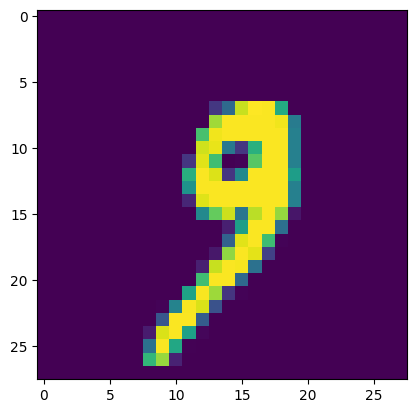

In [ ]:
plt.imshow(test_images[1000])

In [ ]:
preds_cat[1000]

9

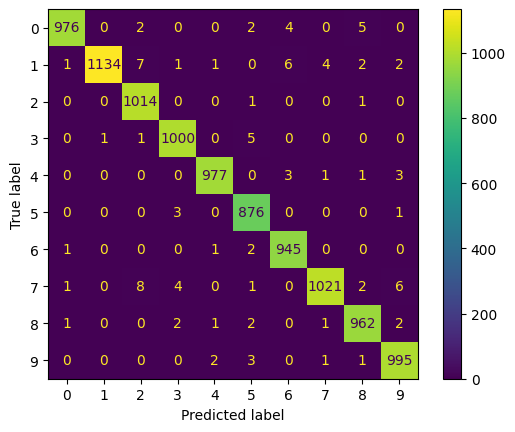

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(preds_cat, test_cat)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()